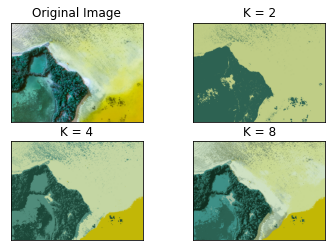

In [1]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('view.jpeg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret1,label1,center1=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
ret2,label2,center2=cv2.kmeans(Z,4,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
ret2,label3,center3=cv2.kmeans(Z,8,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
images = [img, center1, center2, center3]
label = [0 , label1, label2, label3]
for i in range(1,4):
  center = np.uint8(images[i])
  res = center[label[i].flatten()]
  images[i] = res.reshape((img.shape))

titles = ['Original Image', 'K = 2', 'K = 4', 'K = 8']
for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()